* **Youtube Trending Videos**
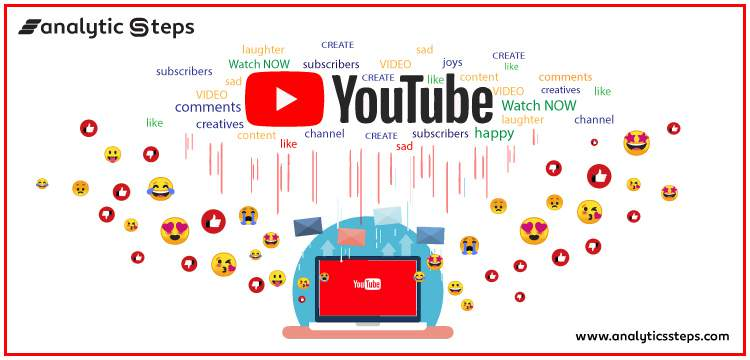

## Let's start

In [ ]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load our data
trending= pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv')

In [ ]:
# Number of columns and rows
trending.shape

In [ ]:
# Let's view the first 5 rows
trending.head(5)

In [ ]:
# How many unique channels do we have in this dataset?
trending['channelTitle'].nunique()

In this dataset, there are 2264 channels.

In [ ]:
# Check for Null values
trending.isna().sum()

There 245 missing description values

In [ ]:
# Imputing data. There are many ways to fill the missing data. For example filling the NAs with the most frequent value, 
# random values, etc.
trending.description= trending.description.fillna('No description provided')           

In [ ]:
# Make sure thre is no null data(We're good to go)
trending.isna().sum().sum()

## Analyze views, likes, dislikes

In [ ]:
# Let's do a regression plot to see the relarionship between views and likes
sns.regplot(data=trending, x='view_count', y='likes', color='Red')
plt.title('Regression plot for views and likes')

This plot is showing a linear relationship between views and likes.

In [ ]:
# Let's perform a regression plot to see the relarionship between views and dislikes
sns.regplot(data=trending, x='view_count', y='dislikes', color= 'blue')
plt.title('Regression plot for views and dislikes')

Compared to the first plot, the dislikes increase as the views increase, but not as much as the first plot. Notice the steeper line in the first graph.

In [ ]:
# Let's view our correlation table:likes, dislikes, views, and comments
df_corr= trending[['likes', 'dislikes', 'comment_count', 'view_count']]
df_corr.corr()

In [ ]:
sns.heatmap(df_corr.corr(), annot= True)

Notice a high correlation between views and likes. That makes sense!
people who like a video tend to leave a comment and vice versa. Howver people who dislike tend not to leave a comment or vice versa.

In [ ]:
# What are the video titles with most likes count
trending[['title', 'likes']].groupby('title').sum().sort_values(by= 'likes', ascending= False).head(5)

In [ ]:
# What are the video titles with most dislikes count
trending[['title', 'dislikes']].groupby('title').sum().sort_values(by= 'dislikes', ascending= False).head(5)

In [ ]:
# What are the video titles with most comments count
trending[['title', 'comment_count']].groupby('title').sum().sort_values(by= 'comment_count',ascending= False ).head(5)

## Sentiment Analysis**

#### Analyze trending tags

In [ ]:
# Display tags
trending.tags.head(10)

In [ ]:
# Let's join tags to get all lines in just one string.
tags_complete=''.join(trending.tags)

In [ ]:
# Display tags as one string
# Rub this to see the result: tags_complete

### As you can see, we got some special charachters in our text. Ex: |, so the next step is to remove the special characters to end up with clean looking data

In [ ]:
# Let's import regular expression module
import re

In [ ]:
# Now we have to substitue any special character by a space.
tags= re.sub('[^a-zA-Z]', ' ', tags_complete)

In [ ]:
# Display tags
tags;

### Notice in the last result, we ended up with extra space, let's ask Python:'Hey Python, whenever you find extra space make it one space only. Thank you!'

In [ ]:
tags= re.sub(' +', ' ', tags)

In [ ]:
# If you haven't installed wordcloud, please do so before you import the modules
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Stopwords are a set of words that we do not need to take in consideration in ou analysis. For example, 
# He, She, they.....
wordcloud= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(tags)

In [ ]:
# Visualize our word cloud
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

The size of the wordcloud indiacates the significance of the tag. 

## Emoji Analysis

In [ ]:
# Install Emoji library.
#!pip install emoji

In [ ]:
# Import module emoji
import emoji

Keep in mind that each emoji has a unicode

In [ ]:
# Let's define a string "str." We are creating a list for the emojis (if a character has a unicode then it will
# be considered an emoji)
str=''
for i in trending.title:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str= str+ele

In [ ]:
# How many emojis do we have in our dataset?
len(str)

In [ ]:
# This is how our str looks like
str

In [ ]:
# Let's count the unique emojis
result={}
for i in set(str):
    result[i]= str.count(i)

In [ ]:
result.items()

In [ ]:
# I will define a dictionary final that has each imoji(key) and its count(value)
final={}
for key, value in sorted(result.items(), key= lambda item:item[1]):
    final[key]= value

In [ ]:
# Display our final result
final

In [ ]:
# Now, we create a data frame for the top used 10 emojis
keys= [*final.keys()]
values=[*final.values()]
df= pd.DataFrame(keys[-10:], values[-10:])

# Visulize my emojis

In [ ]:
df= pd.DataFrame({'chars': keys[-10:], 'num': values[-10]})

In [ ]:
# Import libraries and modules
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
graph = go.Bar(
x= df['chars'],
y= df['num'])
iplot([graph] )
# Hover over the bars to view the emojis along with the count

# The END